In [2]:
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
import random
from tqdm import tqdm
import pandas as pd

In [3]:
dir = r'C:\Users\asifur\Desktop\Fall23CVPR\Mid\train'
class_folders = os.listdir(dir)
X=[]
y=[]
data = []

for class_index,class_folder  in enumerate(class_folders):
    image_folder = os.path.join(dir,class_folder)
    

    for image_file in tqdm(os.listdir(image_folder)):
        img = os.path.join(image_folder,image_file)
        img = cv2.imread(img,cv2.IMREAD_GRAYSCALE)
       
        X.append(img)
        y.append(class_index)
        data.append([X,y])

X = np.array(X)
y = np.array(y)

100%|████████████████████████████████████████████████████████████████████████████| 5000/5000 [00:01<00:00, 4549.60it/s]


In [4]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.2, stratify = y, random_state = 3)
#print(y.shape)

In [5]:
#ModelBuilding
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score


model = KNeighborsClassifier()
model_manhattan = KNeighborsClassifier(n_neighbors=1, metric = 'manhattan')
model_euclidean = KNeighborsClassifier(n_neighbors=1, metric = 'euclidean')

X_2d = X.reshape(X.shape[0],-1)
y_2d = y.reshape(-1,1)

X_train_2d = X_train.reshape(X_train.shape[0], -1)
X_test_2d = X_test.reshape(X_test.shape[0], -1)

y_train_2d = y_train.reshape(-1, 1)
y_test_2d = y_test.reshape(-1, 1)



model.fit(X_train_2d,y_train)
model_manhattan.fit(X_train_2d,y_train)
model_euclidean.fit(X_train_2d,y_train)

test_data_prediction = model.predict(X_test_2d)
accuracy = accuracy_score(y_test_2d,test_data_prediction)

test_data_prediction_manhattan = model_manhattan.predict(X_test_2d)
accuracy_manhattan = accuracy_score(y_test_2d,test_data_prediction_manhattan)

test_data_prediction_euclidean = model_euclidean.predict(X_test_2d)
accuracy_euclidean = accuracy_score(y_test_2d,test_data_prediction_euclidean)

print('KNN Accuracy', model , '=' ,accuracy)
print('KNN Euclidean Metrix Accuracy', model , '=' ,accuracy_euclidean)
print('KNN Manhattan Metrix Accuracy', model , '=' ,accuracy_manhattan)

Accuracy for KNN  KNeighborsClassifier() = 0.2844
Accuracy for KNN Euclidean Metrix  KNeighborsClassifier() = 0.2845
Accuracy for KNN Manhattan Metrix  KNeighborsClassifier() = 0.315


In [6]:
#ResultsAnalysis:

from sklearn.model_selection import cross_val_score

cv_score_lr = cross_val_score(KNeighborsClassifier(), X_2d, y, cv = 5)
print(f"accuracy for five different folds {cv_score_lr}")

mean_accuracy_lr = sum(cv_score_lr)/len(cv_score_lr)
mean_accuracy_lr = mean_accuracy_lr*100
mean_accuracy_lr = round(mean_accuracy_lr,2)

print(f"Mean accuracy : {mean_accuracy_lr}")

accuracy for five different folds [0.2814 0.2783 0.2854 0.269  0.2734]
Mean accuracy : 27.75


In [7]:
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score


k_values = [1, 3, 5, 7, 9]  

mean_accuracy_manhattan = []
mean_accuracy_euclidean = []


skf = StratifiedKFold(n_splits=cv)

for k in k_values:
 
    accuracy_manhattan_fold = []
    accuracy_euclidean_fold = []

    for train_index, test_index in skf.split(X_2d, y_2d):
        X_train, X_test = X_2d[train_index], X_2d[test_index]
        y_train, y_test = y_2d[train_index], y_2d[test_index]

      
        y_train = y_train.ravel()
        y_test = y_test.ravel()

       
        model_manhattan = KNeighborsClassifier(n_neighbors=k, metric='manhattan')
        model_euclidean = KNeighborsClassifier(n_neighbors=k, metric='euclidean')

    
        model_manhattan.fit(X_train, y_train)
        model_euclidean.fit(X_train, y_train)

       
        test_data_prediction_manhattan = model_manhattan.predict(X_test)
        test_data_prediction_euclidean = model_euclidean.predict(X_test)

        
        accuracy_manhattan_fold.append(accuracy_score(y_test, test_data_prediction_manhattan))
        accuracy_euclidean_fold.append(accuracy_score(y_test, test_data_prediction_euclidean))

    mean_accuracy_manhattan.append(np.mean(accuracy_manhattan_fold))
    mean_accuracy_euclidean.append(np.mean(accuracy_euclidean_fold))


for i, k in enumerate(k_values):
    print(f"Mean accuracy for K={k} (Manhattan): {mean_accuracy_manhattan[i] * 100:.2f}%")
    print(f"Mean accuracy for K={k} (Euclidean): {mean_accuracy_euclidean[i] * 100:.2f}%")

Mean accuracy for K=1 (Manhattan): 31.79%
Mean accuracy for K=1 (Euclidean): 29.02%
Mean accuracy for K=3 (Manhattan): 29.28%
Mean accuracy for K=3 (Euclidean): 27.12%
Mean accuracy for K=5 (Manhattan): 30.46%
Mean accuracy for K=5 (Euclidean): 27.75%
Mean accuracy for K=7 (Manhattan): 30.61%
Mean accuracy for K=7 (Euclidean): 28.09%
Mean accuracy for K=9 (Manhattan): 30.65%
Mean accuracy for K=9 (Euclidean): 28.34%


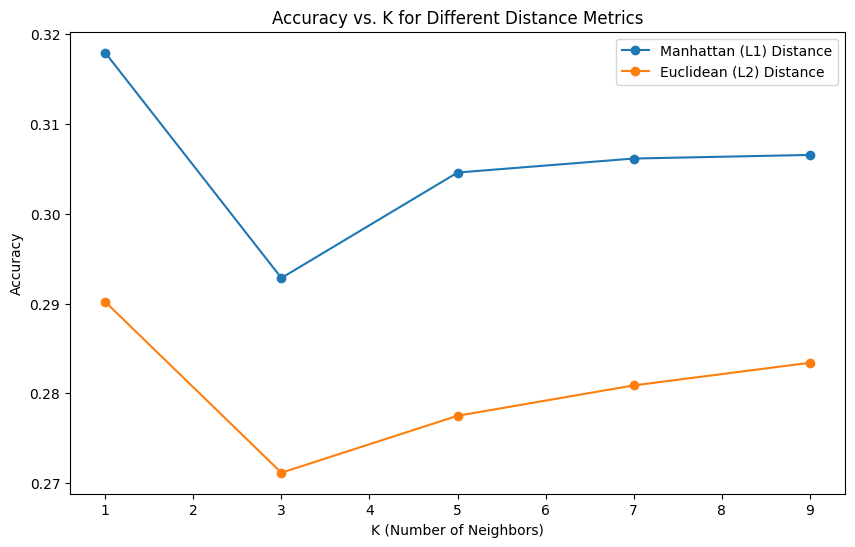

In [8]:
plt.figure(figsize=(10, 6))
plt.plot(k_values, mean_accuracy_manhattan, marker='o', label='Manhattan (L1) Distance')
plt.plot(k_values, mean_accuracy_euclidean, marker='o', label='Euclidean (L2) Distance')
plt.xlabel('K (Number of Neighbors)')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. K for Different Distance Metrics')
plt.legend()
#plt.grid()
plt.show()

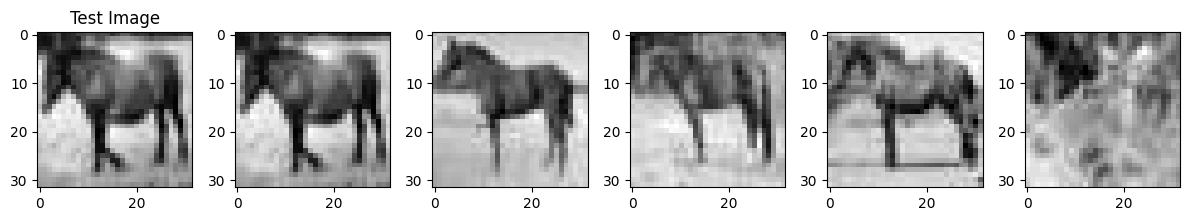

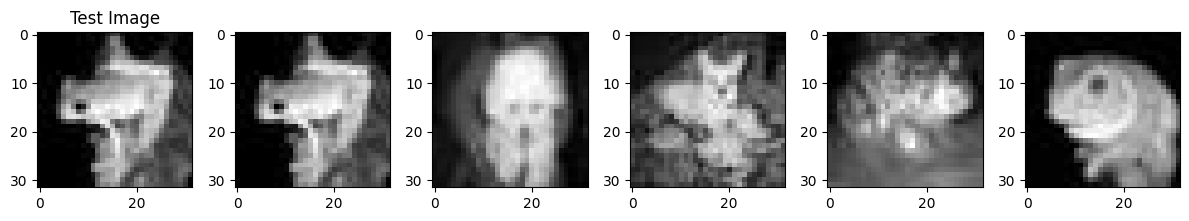

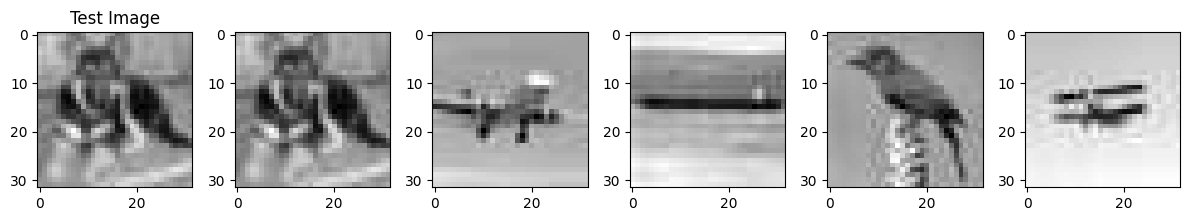

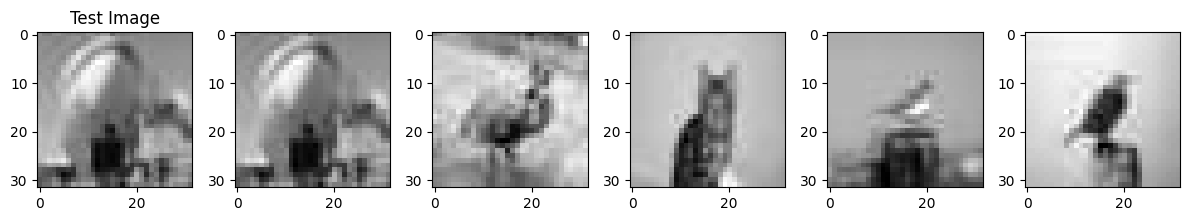

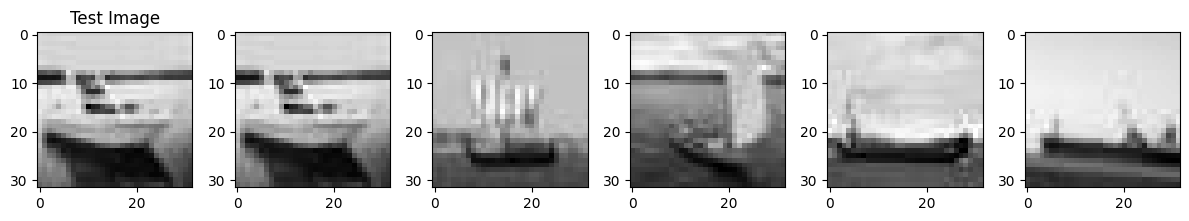

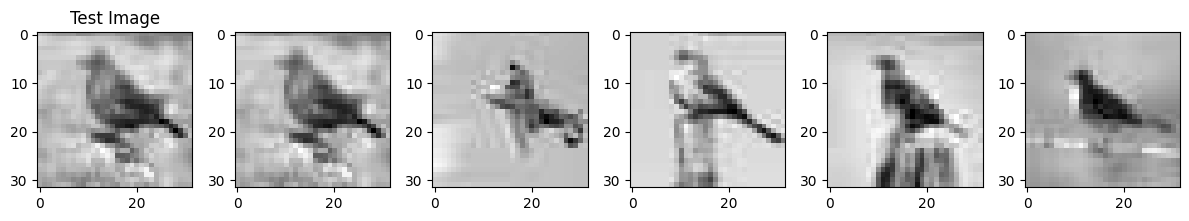

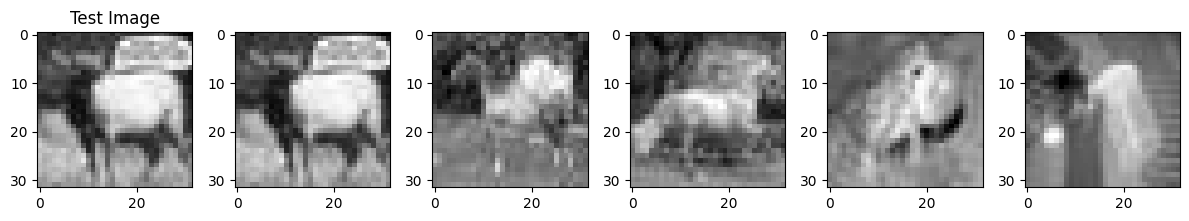

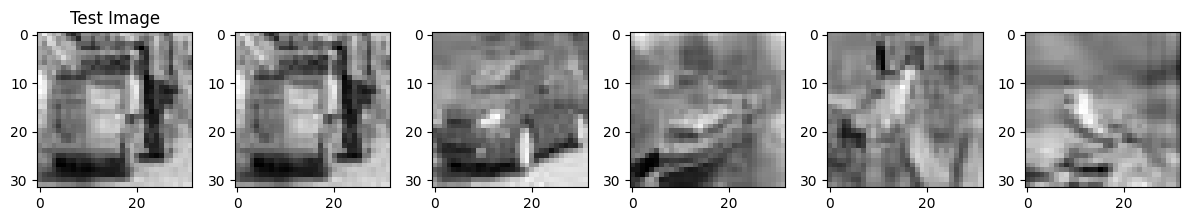

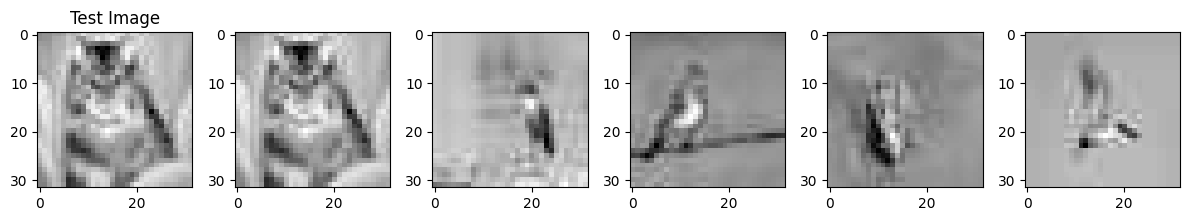

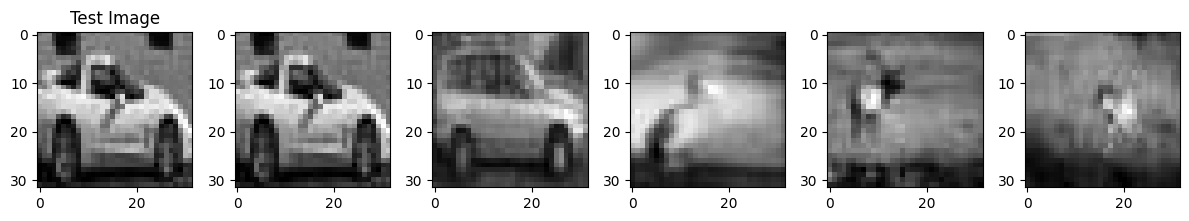

In [14]:
#5predictions

import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
from sklearn.neighbors import NearestNeighbors


test_dir = r'C:\Users\asifur\Desktop\Fall23CVPR\Mid\test'
test_images = []

for image_file in os.listdir(test_dir):
    img_path = os.path.join(test_dir, image_file)
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    test_images.append(img)


test_images_2d = np.array(test_images).reshape(len(test_images), -1)

knn_manhattan = NearestNeighbors(n_neighbors=5, metric='manhattan')
knn_euclidean = NearestNeighbors(n_neighbors=5, metric='euclidean')


knn_manhattan.fit(X_2d)
knn_euclidean.fit(X_2d)


top_k_indices_manhattan = knn_manhattan.kneighbors(test_images_2d, return_distance=False)
top_k_indices_euclidean = knn_euclidean.kneighbors(test_images_2d, return_distance=False)


for i, test_image in enumerate(test_images):
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 6, 1)
    plt.imshow(test_image, cmap='gray')
    plt.title('Test Image')

    for j in range(5):
        plt.subplot(1, 6, j + 2)
        top_k_index_manhattan = top_k_indices_manhattan[i][j]
        similar_image_manhattan = X[top_k_index_manhattan].reshape(32, 32)
        plt.imshow(similar_image_manhattan, cmap='gray')

        top_k_index_euclidean = top_k_indices_euclidean[i][j]
        similar_image_euclidean = X[top_k_index_euclidean].reshape(32, 32)
        plt.imshow(similar_image_euclidean, cmap='gray')


    plt.tight_layout()
    plt.show()